# Lab 02 - Classification

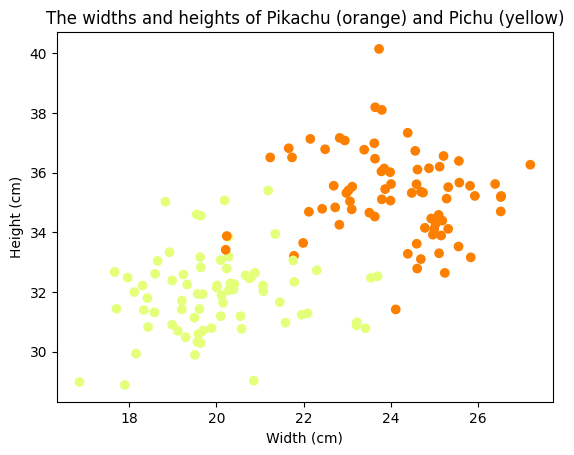

In [2]:
import matplotlib.pyplot as plt
import numpy as np

data_path = "../Lab-02/Data/datapoints.txt"
test_data_path = "../Lab-02/Data/testpoints.txt"

with open(data_path, "r") as read_data_file, open(test_data_path, "r") as read_test_file:   
    # Cleaning the datapoints file and converting data to datatype float in a nestled list
    data_list = [data.strip(" \n").replace(" ","").replace("","").split(",") for data in read_data_file]
    data_list.pop(0)
    data_points = [[float(data_point) for data_point in data] for data in data_list]

    # Cleaning the testpoints file and converting test data to datatype float in a nestled list
    test_data_list = [test_data.strip(" \n").replace(" ", "").replace("(", "").replace(")", "").split(",") for test_data in read_test_file]
    test_data_list.pop(0)
    test_data_points = [[float(test_data[0][2:]), float(test_data[1])] for test_data in test_data_list]

# Creating the datapoints and testpoints arrays
data_points_array = np.array(data_points)
test_data_points_array = np.array(test_data_points)

plt.scatter(data_points_array[:,0], data_points_array[:,1], c = data_points_array[:,2], cmap="Wistia")
plt.title("The widths and heights of Pikachu (orange) and Pichu (yellow)")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.show()

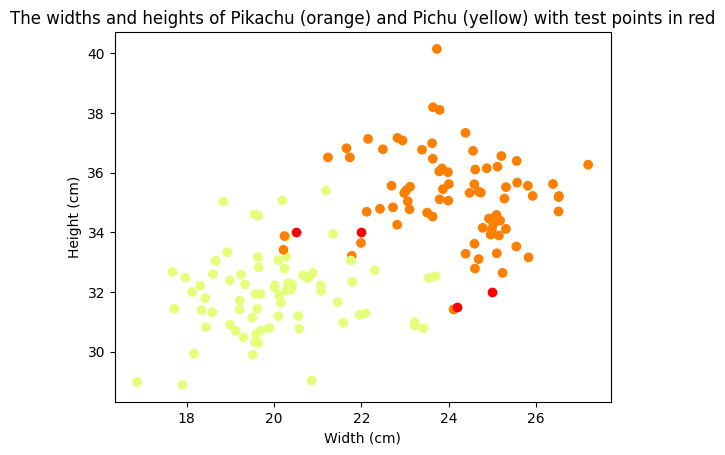

In [3]:
plt.scatter(data_points_array[:,0], data_points_array[:,1], c = data_points_array[:,2], cmap="Wistia")
plt.scatter(test_data_points_array[:,0], test_data_points_array[:,1], c = "red")
plt.title("The widths and heights of Pikachu (orange) and Pichu (yellow) with test points in red")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.show()

In [4]:
import math

def distance_between_points(input_data_row, training_data_row):
    distance = 0.0
    for index in range(0,len(input_data_row)):
        distance += (input_data_row[index] - training_data_row[index])**2
    return math.sqrt(distance)

def retrieve_nearest_neighbors(training_data, test_data_row, number_of_neighbors):
	distance_points = []
	for training_data_row in training_data:
		distance = distance_between_points(test_data_row, training_data_row)
		distance_points.append((distance, training_data_row))
	distance_points.sort(key=lambda key: key[0])
	nearest_neighbors = []
	for index in range(number_of_neighbors):
		nearest_neighbors.append(distance_points[index][1])
	return nearest_neighbors

def classify_pokemon(training_data, test_row, number_of_neighbors):
	neighbors = retrieve_nearest_neighbors(training_data, test_row, number_of_neighbors)
	for neighbor in neighbors:
		if neighbor[2] == 1:
			print(f"The point ({test_row[0]}, {test_row[1]}) is classified as a Pikachu, based on {number_of_neighbors} number of nearest points")
		else:
			print(f"The point ({test_row[0]}, {test_row[1]}) is classified as a Pichu, based on {number_of_neighbors} number of nearest points")

for test_index in range(len(test_data_list)):
	pokemon = classify_pokemon(data_points, test_data_points[test_index], 1)
print(pokemon)

The point (25.0, 32.0) is classified as a Pikachu, based on 1 number of nearest points
The point (24.2, 31.5) is classified as a Pikachu, based on 1 number of nearest points
The point (22.0, 34.0) is classified as a Pikachu, based on 1 number of nearest points
The point (20.5, 34.0) is classified as a Pichu, based on 1 number of nearest points
None


In [6]:
while True:
    try:
        user_input_width = float(input("Please enter a width (cm): "))
        if user_input_width <= 0:
            raise ValueError(f"You entered {user_input_width}. You need to enter a valid width value, that is above 0 and not a negative number!")
        break        
    except ValueError as error:
        print(error)
        
        
while True:
    try:
        user_input_height = float(input("Please enter a height (cm): "))
        if user_input_height <= 0:
            raise ValueError(f"You entered {user_input_height}. You need to enter a valid height value, that is above 0 and not a negative number!")
        break
    except ValueError as error:
        print(error)

while True:
    try:
        user_input_compare = float(input("Please enter how many datapoints to compare with: "))
        if user_input_compare <= 0:
            raise ValueError(f"You entered {user_input_compare}. You need to enter a valid comparsion value, that is above 0 and not a negative number!")
        break
    except ValueError as error:
        print(error)

user_input = np.array([user_input_width, user_input_height, user_input_compare])

pokemon = classify_pokemon(data_points, user_input[0:2], int(user_input[2:]))
print(pokemon)

could not convert string to float: 'twenty'
You entered -2.0. You need to enter a valid width value, that is above 0 and not a negative number!
You entered 0.0. You need to enter a valid width value, that is above 0 and not a negative number!
could not convert string to float: 'three'
You entered -21.0. You need to enter a valid height value, that is above 0 and not a negative number!
You entered 0.0. You need to enter a valid height value, that is above 0 and not a negative number!
could not convert string to float: 'one'
You entered -1.0. You need to enter a valid comparsion value, that is above 0 and not a negative number!
You entered 0.0. You need to enter a valid comparsion value, that is above 0 and not a negative number!
The point (21.0, 31.0) is classified as a Pichu, based on 1 number of nearest points
None
